In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key as api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | paamiut
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | manicore
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | arman
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | beyneu
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | cabedelo
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | samusu
City not found. Skipping...
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | omboue
Processing Record 20 of Set 1 | peleduy
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | bambous vir

City not found. Skipping...
Processing Record 38 of Set 4 | baykit
Processing Record 39 of Set 4 | westpunt
City not found. Skipping...
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | changji
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | birao
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | morro bay
Processing Record 46 of Set 4 | nhulunbuy
Processing Record 47 of Set 4 | shahreza
Processing Record 48 of Set 4 | zhenhai
Processing Record 49 of Set 4 | noyabrsk
Processing Record 50 of Set 4 | burica
City not found. Skipping...
Processing Record 1 of Set 5 | wanlaweyn
Processing Record 2 of Set 5 | saldanha
Processing Record 3 of Set 5 | eregli
Processing Record 4 of Set 5 | bayan
Processing Record 5 of Set 5 | ovca
Processing Record 6 of Set 5 | airai
Processing Record 7 of Set 5 | haines junction
Processing Record 8 of Set 5 | broome
Processing Record 9 of Set 5 | lasa
Processing Record 10 of Set 5 | kamenskoye
City 

Processing Record 29 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 8 | kibala
Processing Record 31 of Set 8 | la rioja
Processing Record 32 of Set 8 | manakara
Processing Record 33 of Set 8 | dagua
Processing Record 34 of Set 8 | zhangjiakou
Processing Record 35 of Set 8 | pali
Processing Record 36 of Set 8 | suixi
Processing Record 37 of Set 8 | general roca
Processing Record 38 of Set 8 | sawakin
Processing Record 39 of Set 8 | cortez
Processing Record 40 of Set 8 | gobindapur
Processing Record 41 of Set 8 | tottori
Processing Record 42 of Set 8 | valparaiso
Processing Record 43 of Set 8 | barcelos
Processing Record 44 of Set 8 | mackay
Processing Record 45 of Set 8 | mozarlandia
Processing Record 46 of Set 8 | tallahassee
Processing Record 47 of Set 8 | bubaque
Processing Record 48 of Set 8 | okitipupa
Processing Record 49 of Set 8 | luzhou
Processing Record 50 of Set 8 | north bend
Processing Record 1 of Set 9 | beringovskiy
Processing Record 2 of S

Processing Record 17 of Set 12 | palmerston
Processing Record 18 of Set 12 | maniitsoq
Processing Record 19 of Set 12 | lamont
Processing Record 20 of Set 12 | mount gambier
Processing Record 21 of Set 12 | saint anthony
Processing Record 22 of Set 12 | pahrump
Processing Record 23 of Set 12 | rohru
Processing Record 24 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 25 of Set 12 | north myrtle beach
Processing Record 26 of Set 12 | havre-saint-pierre
Processing Record 27 of Set 12 | shintomi
Processing Record 28 of Set 12 | sola
Processing Record 29 of Set 12 | preston
Processing Record 30 of Set 12 | mill valley
Processing Record 31 of Set 12 | anzio
Processing Record 32 of Set 12 | omsukchan
Processing Record 33 of Set 12 | bow island
Processing Record 34 of Set 12 | mentok
City not found. Skipping...
Processing Record 35 of Set 12 | emba
Processing Record 36 of Set 12 | grindavik
Processing Record 37 of Set 12 | banjar
Processing Record 38 of Set 12 | rungata
C

In [7]:
print(len(city_data))

555


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,59.02,91,75,11.99,AR,2021-11-30 01:23:02
1,Paamiut,61.9940,-49.6678,32.18,98,100,29.51,GL,2021-11-30 01:23:02
2,Jamestown,42.0970,-79.2353,33.39,93,90,11.50,US,2021-11-30 01:23:02
3,Manicore,-5.8092,-61.3003,75.09,90,92,0.43,BR,2021-11-30 01:23:03
4,Carnarvon,-24.8667,113.6333,75.27,60,0,24.16,AU,2021-11-30 01:21:58
5,Sao Filipe,14.8961,-24.4956,75.13,69,100,15.01,CV,2021-11-30 01:23:04
6,Kapaa,22.0752,-159.3190,82.38,77,75,5.99,US,2021-11-30 01:18:14
7,Arman,59.7000,150.1667,0.01,85,100,8.48,RU,2021-11-30 01:23:04
8,Narsaq,60.9167,-46.0500,34.02,99,100,9.08,GL,2021-11-30 01:20:14
9,Beyneu,45.3167,55.2000,37.90,64,0,12.95,KZ,2021-11-30 01:23:05


In [9]:
#Reorder columns
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-11-30 01:23:02,-38.0023,-57.5575,59.02,91,75,11.99
1,Paamiut,GL,2021-11-30 01:23:02,61.9940,-49.6678,32.18,98,100,29.51
2,Jamestown,US,2021-11-30 01:23:02,42.0970,-79.2353,33.39,93,90,11.50
3,Manicore,BR,2021-11-30 01:23:03,-5.8092,-61.3003,75.09,90,92,0.43
4,Carnarvon,AU,2021-11-30 01:21:58,-24.8667,113.6333,75.27,60,0,24.16
...,...,...,...,...,...,...,...,...,...
550,Mitsamiouli,KM,2021-11-30 01:40:17,-11.3847,43.2844,80.29,78,11,8.79
551,Urucara,BR,2021-11-30 01:40:17,-2.5364,-57.7600,77.70,85,97,1.61
552,Ixtapa,MX,2021-11-30 01:40:18,20.7000,-105.2000,71.24,79,5,2.01
553,San Quintin,MX,2021-11-30 01:40:18,30.4833,-115.9500,61.66,81,0,6.89


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

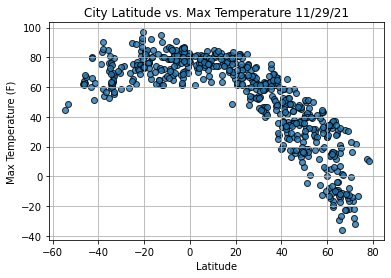

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

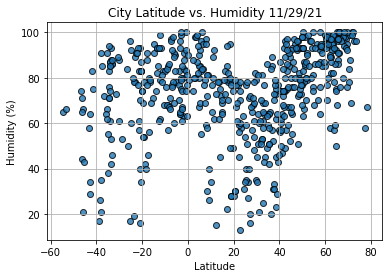

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

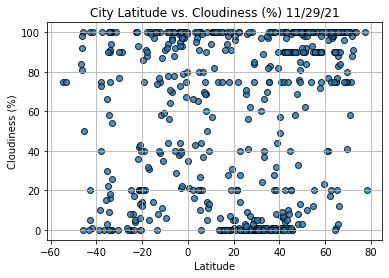

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

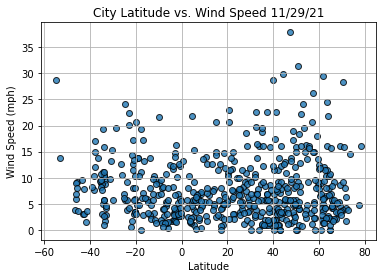

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()